In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics

Regression models are used to understand the relationship of a continuous dependent variable and one or more continuous independent variable. These models also help in predicting the outcome of a target (dependent variable) based on unseen dataset of the independent variables used in the model previously to analyze the relationship. In this project I have compared the results of the four regression models: multiple linear, polynomial, LASSO and RIDGE on the same dataset and proposed the best model for the dataset.

For my analysis I have used a dataset obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston). This dataset contains census data collected by the U.S. Census Service regarding the dwellings in Boston area. 

In [71]:
#Load the data from csv file

df=pd.read_csv("Real estate.csv")

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Data Visualization

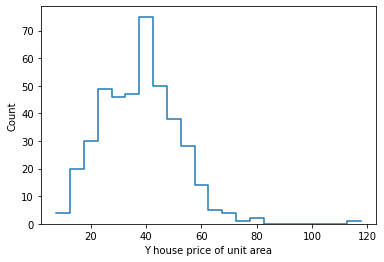

In [6]:
sns.histplot(df , x = 'Y house price of unit area', fill = False, element = 'step')
plt.show()

Clearly from the above histogram we can see maximum number of properties are priced around 20000 Dollars and as we go to the right hand side of the plot we see lesser properties, that implies there are fewer properties with high value, though we see there is a significant number of houses more than 50000 Dollars that would account for the properties owned by the elite society in the city.

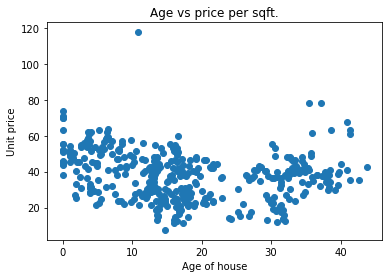

In [7]:
# Correlation between Age of house and price per sqft.

plt.scatter(df['X2 house age'],df['Y house price of unit area'])
plt.xlabel('Age of house')
plt.ylabel('Unit price')
plt.title('Age vs price per sqft.')
plt.show()
plt.close()

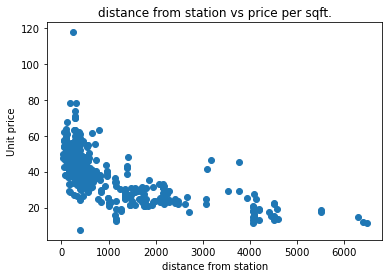

In [8]:
# Correlation between distance from station and price per sqft.

plt.scatter(df['X3 distance to the nearest MRT station'],df['Y house price of unit area'])
plt.xlabel('distance from station')
plt.ylabel('Unit price')
plt.title('distance from station vs price per sqft.')
plt.show()
plt.close()

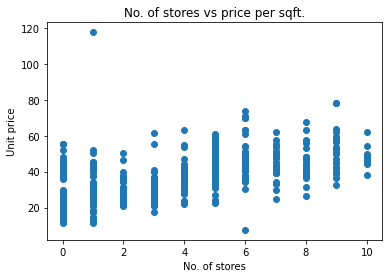

In [9]:
# Correlation between Number of stores in the vicinity and price per sqft.

plt.scatter(df['X4 number of convenience stores'],df['Y house price of unit area'])
plt.xlabel('No. of stores')
plt.ylabel('Unit price')
plt.title('No. of stores vs price per sqft.')
plt.show()
plt.close()


The last row of the matrix gives the correlation of the output variable 'Y house proce of unit area' with the other independent variables. As we can see that there is high correlation of ‘Y’ with ‘X3 distance to the nearest MRT station’ and ‘X4 number of convenience stores’whereas ‘X2 house age’ is negatively correlated to the value of the house, i.e., older the house the lesser the value of the house

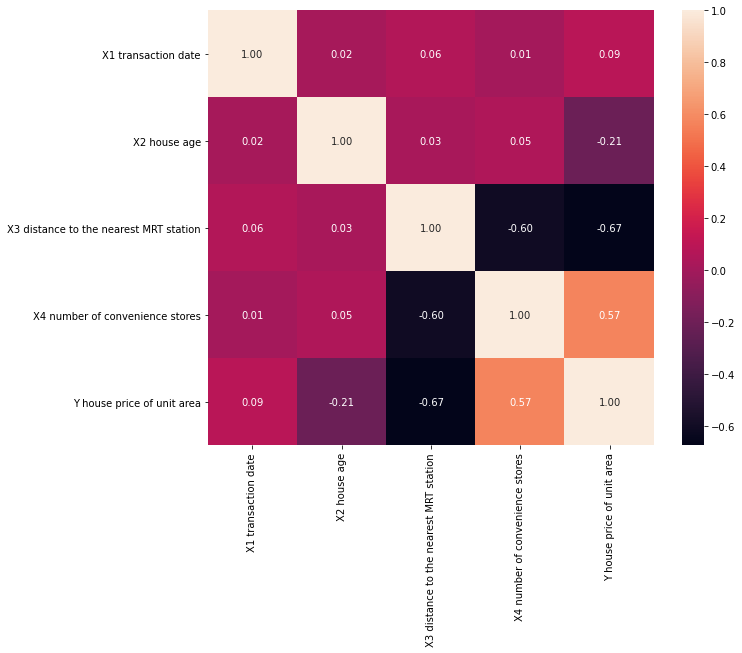

In [10]:
df2=df.copy()
df2.drop('No', axis=1, inplace=True)
df2.drop('X5 latitude', axis=1, inplace=True)
df2.drop('X6 longitude', axis=1, inplace=True)
corr = df2.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', ax=ax);

Outliers are data points that differ significantly from majority of the observations. An outlier can cause issues in statistical analyses hence removing an outlier often provides better results for any statistical analyses

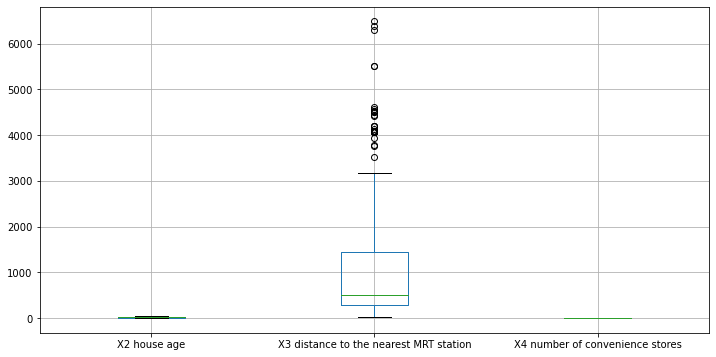

In [74]:
plt.subplots(figsize=(12, 6))
boxplot = df.boxplot(column=['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores'])
plt.show()

Multiple Linear Regression

Linear regression is a linear method of representation of the relationship between the continuous independent variables or predictors and the outcome or dependent variable.

In [21]:
X=df[['X4 number of convenience stores','X2 house age','X3 distance to the nearest MRT station']]
Y=df['Y house price of unit area']

In [22]:
from sklearn.feature_selection import f_regression
X.rename(columns={'X4 number of convenience stores':'X1','X2 house age':'X2','X3 distance to the nearest MRT station':'X3'},inplace=True)
p_value=f_regression(X,Y)[1]
p_value

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


array([3.41348334e-37, 1.56042550e-05, 4.63982503e-56])

In [24]:
#training the model after splitting into training and test sets

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)
mlr = LinearRegression()  
mlr.fit(x_train, y_train)


LinearRegression()

Below are the values of the intercept and the regression coefficients for each of the independent variables

In [25]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X, mlr.coef_))

Intercept:  43.562308941910736
Coefficients:


[('X1', 1.1944081839061849),
 ('X2', -0.2587851756512228),
 ('X3', -0.005373520456263381)]

In [26]:
#Predicting the test set
y_pred_mlr= mlr.predict(x_test)

In [27]:
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [43.36985651 34.54554541 52.16968998 39.07107603 49.40386408 32.4959284
 47.23806666 49.40386408 49.15432837 32.03669994 35.49259976 43.73558025
 40.55595427 31.79926734 47.80929628 37.89317368 51.52945771 42.42747573
 32.91961151 29.32596496 12.65076177 43.09067077 36.41638644 49.60896743
 30.17624294 33.09699954 24.34696971 41.08065358 39.89259035 40.00479663
 52.56593317 37.96039374 43.12167312 43.8132158  30.21947938 46.76591701
 36.04297242 17.3058054  46.60290741 51.94497163 43.92998106 42.98451755
 33.54774094 34.26492473 39.93795372 43.78733728 40.89280732 30.66660285
 40.6692874  46.85339733 40.37564687 33.53932605 38.95547673 38.12089787
 49.15432837 44.71963588 46.77147665 34.34256028 47.61817878 31.64971782
 38.50464235 46.48827374 47.70578221 36.47819514 38.80020562 45.98182299
 47.86105331 44.33078615 38.08967698 48.48882226  6.21234182 32.95720316
 43.73558025 46.87499072 46.82323369 33.68285636 47.02529238 33.62059055
 39.78907628 25.85918329 40

In [28]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

,Actual value,Predicted value
121,48.0,43.369857
353,31.3,34.545545
96,59.5,52.169690
43,34.1,39.071076
125,48.6,49.403864
...,...,...
157,35.6,39.789076
184,21.8,25.859183
129,41.0,40.794781
357,44.9,52.490532


The KPIs for this model is computed as below:

In [20]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_mlr)
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}',score)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: {:.2f} 0.6447893915467486
Mean Absolute Error: 5.729173972473758
Mean Square Error: 53.025696287545216
Root Mean Square Error: 7.281874503693758


The proportion of variance (R-squared) of the output variableis explained by the predictors in our multiple linear regression model is 0.644.
So, 64.47% percent variability in the price can be explained by the variance in the dependent variables. I have also plotted the predicted value y_pred_mlr with the residuals to check the Homoscedasticity or the variance that the residuals have across the regression line.

Mean of Residuals 0.3204019887796251


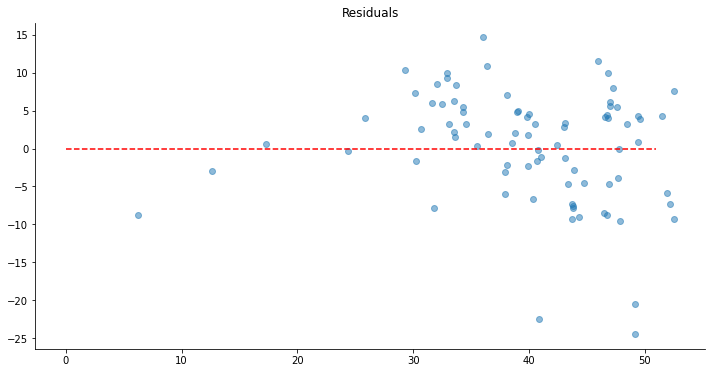

In [31]:
residuals=y_pred_mlr-y_test
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=y_pred_mlr, y=residuals, alpha=0.5)
plt.plot(np.repeat(0,y_pred_mlr.max()), color='red', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()  

The below plot shows the normality of error or residuals, we can see that the histogram is left skewed that means there are more negative errors than positive errors.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


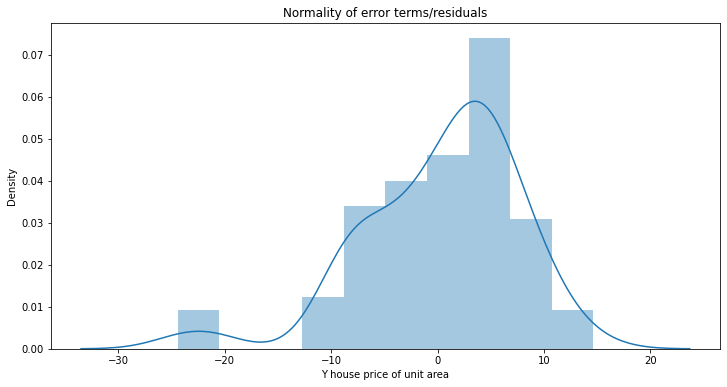

In [35]:
plt.subplots(figsize=(12, 6))
sns.distplot(residuals,kde=True)
plt.title('Normality of error terms/residuals')
plt.show()

Polynomial Regression

Polynomial regression is a non-linear technique of regression analysis where the output or the dependent variable is designed as
an nth degree of a polynomial function of the independent
variable or predictor. In many datasets the relationship between
the independent variable and the output or the dependent variable
is not linear, in such cases a polynomial form of model may be
used. The independent variable being used here os 'X2 house age'

In [37]:
df2=df[["X2 house age","Y house price of unit area"]]

df2.rename(columns={'X2 house age':'X','Y house price of unit area':'Y'},inplace=True)
X=df2.iloc[:,0:1].values 
Y=df2.iloc[:,1].values

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [39]:
#Splitting the dataset to training and test sets and building the model

from sklearn.preprocessing import PolynomialFeatures
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)
poly_reg = PolynomialFeatures(degree=9)
X_poly = poly_reg.fit_transform(x_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression()

Below are the values of the intercept and the regression coefficients for the model

In [41]:
print("Intercept: ", pol_reg.intercept_)
print("Coefficients:")
list(zip(X, pol_reg.coef_))

Intercept:  53.64067175439275
Coefficients:


[(array([32.]), 0.0),
 (array([19.5]), -10.009728419780542),
 (array([13.3]), 3.758191437588922),
 (array([13.3]), -0.5950754053601135),
 (array([5.]), 0.04529262171569401),
 (array([7.1]), -0.0017531419848789932),
 (array([34.5]), 3.0088581035777272e-05),
 (array([20.3]), 2.247337171391861e-08),
 (array([31.7]), -7.500892684753069e-09),
 (array([17.9]), 6.968825516651123e-11)]

In [46]:
# Predicting the test set

X_poly_test=poly_reg.fit_transform(x_test)
y_pred_plr=pol_reg.predict(X_poly_test)
plr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_plr})
plr_diff

,Actual value,Predicted value
0,48.0,34.193155
1,31.3,45.673065
2,59.5,46.740373
3,34.1,38.883819
4,48.6,46.448880
...,...,...
78,35.6,31.494232
79,21.8,33.454968
80,41.0,45.426299
81,44.9,53.640672


In [43]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_plr)
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_plr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_plr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_plr))
print('R squared: {:.2f}',score)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: {:.2f} 0.13252950438657796
Mean Absolute Error: 9.701970731379802
Mean Square Error: 129.49564552449843
Root Mean Square Error: 11.379615350463233


Above are the KPIs for the model.
The R-squared value for this model is 0.1325, which makes our
model explain 13.25% variability in the price.I
have also plotted the predicted value y_pred_plr with the residuals
to check the Homoscedasticity or the variance that the residuals
have across the regression line

Mean of Residuals -1.3715112636866518


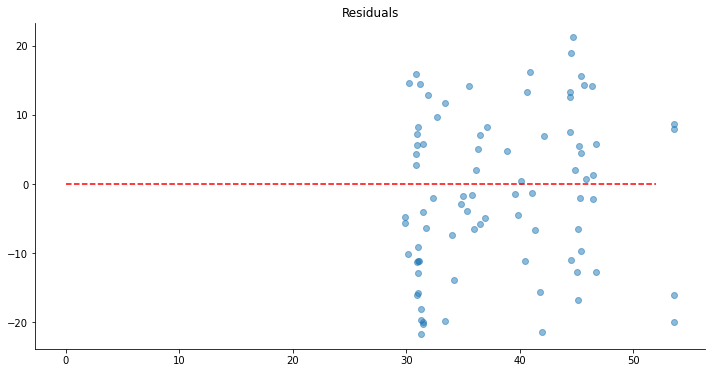

In [44]:
residuals=y_pred_plr-y_test
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=y_pred_plr, y=residuals, alpha=0.5)
plt.plot(np.repeat(0,y_pred_plr.max()), color='red', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()  

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


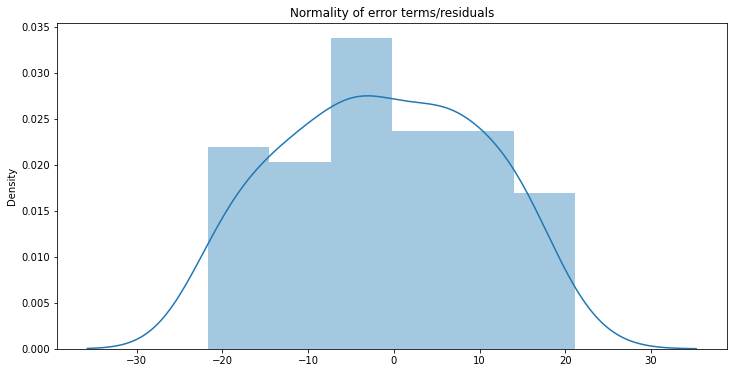

In [45]:
plt.subplots(figsize=(12, 6))
sns.distplot(residuals,kde=True)
plt.title('Normality of error terms/residuals')
plt.show()

RIDGE Regression

Ridge Regression is a technique often used for datasets with
multicollinearity i.e., when the predictors or the independent
variables have high correlation with each other. From the heat
map from Figure 1, we can see that the independent variables are
correlated some of them have high correlation. In such a
multicollinear dataset the variance of the least square estimates
(OLS) is large. Reduction of errors can be achieved by addition of
bias to the regression estimates.

In [47]:
data=pd.read_csv("Real estate.csv")
df=data[["X3 distance to the nearest MRT station","X4 number of convenience stores","X2 house age","Y house price of unit area"]]

df.rename(columns={'X3 distance to the nearest MRT station':'X1','X4 number of convenience stores':'X2','X2 house age':'X3','Y house price of unit area':'Y'},inplace=True)
X=df.iloc[:,0:3].values 
Y=df.iloc[:,3].values

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [50]:
#Splitting the dataset to training and test sets and building the model

from sklearn.linear_model import Ridge
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 
y_pred_ridge= rr.predict(x_test) 

In [52]:
# Predicting the test set

plr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_ridge})
plr_diff

,Actual value,Predicted value
0,48.0,43.369855
1,31.3,34.545540
2,59.5,52.169665
3,34.1,39.071072
4,48.6,49.403856
...,...,...
78,35.6,39.789079
79,21.8,25.859195
80,41.0,40.794774
81,44.9,52.490503


Below are the KPIs for the ridge regression model:

In [53]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_ridge)
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_ridge)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_ridge)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))
print('R squared: {:.2f}',score)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: {:.2f} 0.6447891597989146
Mean Absolute Error: 5.729175259448023
Mean Square Error: 53.025730882768364
Root Mean Square Error: 7.281876879127274


Mean of Residuals 0.3204002891410913


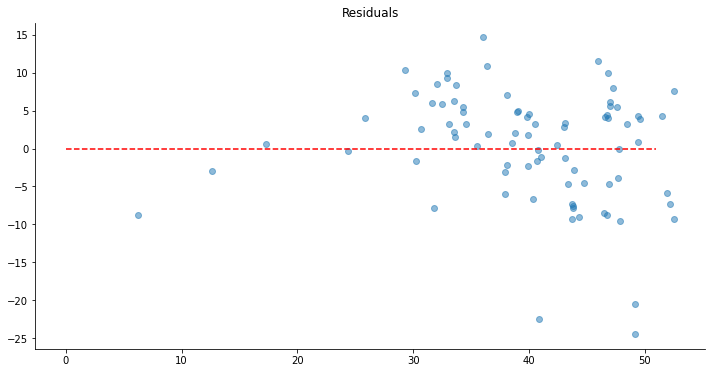

In [54]:
residuals=y_pred_ridge-y_test
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=y_pred_ridge, y=residuals, alpha=0.5)
plt.plot(np.repeat(0,y_pred_ridge.max()), color='red', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()  

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


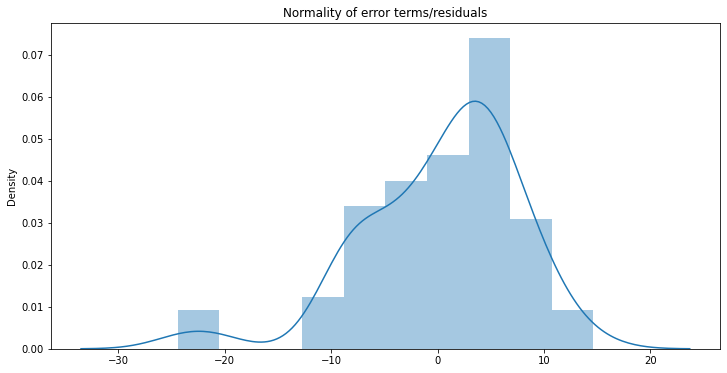

In [55]:
plt.subplots(figsize=(12, 6))
sns.distplot(residuals,kde=True)
plt.title('Normality of error terms/residuals')
plt.show()

LASSO

The LASSO or Least Absolute Shrinkage and Selection Operator
is like the Ridge regression, this regression model also uses
shrinkage, where the data values are shrunk towards a central
point like mean. Unlike the Ridge model LASSO uses absolute
mean values instead of squares in the penalty function

In [56]:
data=pd.read_csv("Real estate.csv")
df=data[["X3 distance to the nearest MRT station","X4 number of convenience stores","X2 house age","Y house price of unit area"]]

df.rename(columns={'X3 distance to the nearest MRT station':'X1','X4 number of convenience stores':'X2','X2 house age':'X3','Y house price of unit area':'Y'},inplace=True)
X=df.iloc[:,0:3].values 
Y=df.iloc[:,3].values


C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [57]:
#Splitting the dataset to training and test sets and building the model

from sklearn.linear_model import Lasso
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
y_pred_lasso= model_lasso.predict(x_test)

In [58]:
plr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_lasso})
plr_diff

,Actual value,Predicted value
0,48.0,43.369094
1,31.3,34.543068
2,59.5,52.161906
3,34.1,39.071022
4,48.6,49.400531
...,...,...
78,35.6,39.789599
79,21.8,25.862119
80,41.0,40.794180
81,44.9,52.481345


In [59]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_lasso)
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_lasso)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_lasso)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
print('R squared: {:.2f}',score)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: {:.2f} 0.6447278163081229
Mean Absolute Error: 5.729414743597217
Mean Square Error: 53.03488821431908
Root Mean Square Error: 7.28250562748283


Mean of Residuals 0.31982371891959843


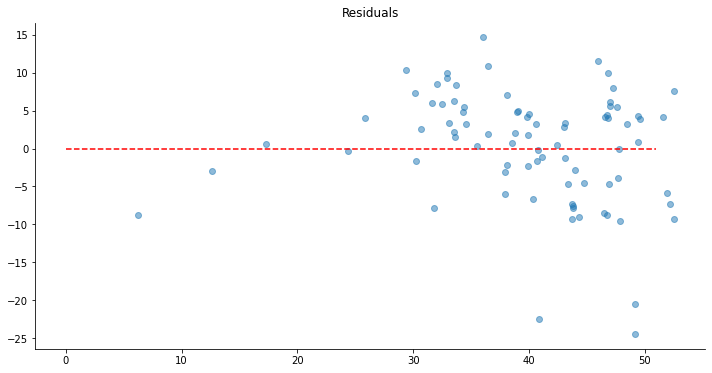

In [60]:
residuals=y_pred_lasso-y_test
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=y_pred_lasso, y=residuals, alpha=0.5)
plt.plot(np.repeat(0,y_pred_lasso.max()), color='red', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()  

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


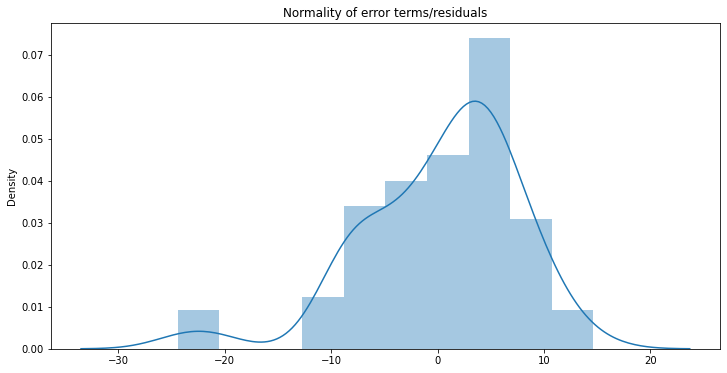

In [61]:
plt.subplots(figsize=(12, 6))
sns.distplot(residuals,kde=True)
plt.title('Normality of error terms/residuals')
plt.show()

Comparing the R-squared of all the models Polynomial
Regression has the worst predictions. The Multiple Linear
Regression, Ridge and LASSO models have very similar R-squared and mean absolute error or root mean square errors. The
performance of the multiple Linear Regression is slightly better
than the LASSO or the Ridge model.
The best regression technique can be determined based on
multiple factors like the type of independent and dependent
variables, multicollinearity of the dataset etc. If the number
variables are too high, then the model tends to be over specified
and less precise.

Gradient Boosting

Gradient Boosting is often used in regression models, it minimizes
the bias error of the model hence improving the performance of
the model. I have used the Gradient Boosting Regressor for the
dataset to predict the values of Y for x_test

In [76]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import ensemble

df=pd.read_csv("Real estate.csv")
X=df[['X4 number of convenience stores','X2 house age','X3 distance to the nearest MRT station']]
Y=df['Y house price of unit area']


params={'n_estimators':3,'max_depth':3,'learning_rate':1,'criterion':'mse'}
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
score=r2_score(y_test,y_pred)
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}',score)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


R squared: {:.2f} 0.6928063936143595
Mean Absolute Error: 4.977699428047797
Mean Square Error: 45.857737595763474
Root Mean Square Error: 6.77183413823489


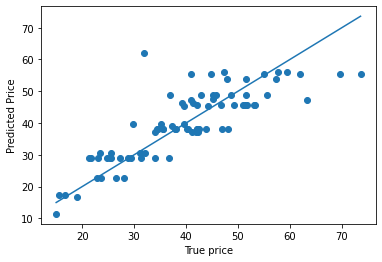

In [80]:
plt.scatter(y_test,y_pred)
x = np.linspace(y_test.min(), y_test.max(), 1000)
plt.plot(x, x + 0, linestyle='solid')
plt.xlabel('True price')
plt.ylabel('Predicted Price')

plt.show()
plt.close()

The R-squared of the model is 0.69 which is a little
improvement from the previous models. 